## Comparison of different types of image kernels through Convolution

### Created by: Kavin Fidel<br>


### Importing Libraries

Libraries used:<br>
* Numpy
* matplotlib
* Pillow

In [2]:
import random 
import cv2 
  


In [3]:
import numpy as np
from PIL import Image, ImageOps
import matplotlib.pyplot as plt

In [4]:

img = Image.open(r'C:\Users\ADMIN\Documents\Fidel_Sem5\dsp_project\cat.jpg')
# Image is opened
img = ImageOps.grayscale(img)
# Turning to grayscale
img = img.resize(size = (200,200)) # We resize the image



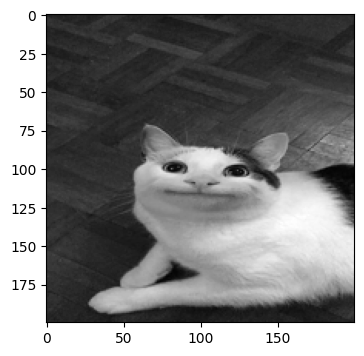

In [5]:
plt.figure(figsize = (4,4))
plt.imshow(img, cmap = 'gray')
# Plotting the image

### Types of Kernels


Kernels used<br> 
* sharp<br> 
* blur<br> 
* outline<br>
* emboss<br>

In [6]:
sharp = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
])

blur = np.array([
    [0.0625, 0.125, 0.0625],
    [0.125,  0.25,  0.125],
    [0.0625, 0.125, 0.0625]
])

outline = np.array([
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1]
])

emboss = np.array([[-2, -1,  0,],
[-1,  1,  1],
 [0,  1,  2]
])
\

guassian = np.array([[1,2,1],
                     [2,4,2],
                     [1,2,1]])

### Calulating Target Size

The target size essential is the size of the image after it has been convolved with the filter(blur or sharp or border)

In [7]:
def calculate_target_size(img_size:int, kernel_size:int) -> int:
  pixels = 0

  for i in range(img_size):
    added = i + kernel_size # adding the kernel size

    if added <= img_size:
      pixels += 1 # number of pixels is incremented

  return pixels



### Defining the convolution function

In [8]:
def convolution(img: np.array, kernel : np.array) -> np.array:
    # The function accepts the images as numpy arrays.
    target_size = calculate_target_size(
        img_size = img.shape[0],
        kernel_size = kernel.shape[0]
    )
    k = kernel.shape[0] # This will be used inside the for loop

    conv_img = np.zeros(shape =(target_size, target_size))
    # we are initializing the convolved image with np.zeros

    # Performing convolution by using 2 for loops
    for i in range(target_size): # Iterating throughout the rows
      for j in range(target_size): # Iterating throughout the columns
        mat = img[i:i+k, j:j+k] # Here we create "mat", which takes each element across the rows and columns of the image.

        conv_img[i,j] = np.sum(np.multiply(mat,kernel))
      # Here we are using numpy's inbuilt function to perform multiplication and summation element wise
    return conv_img


### Blurred Image

In [9]:
image_blur = convolution(img = np.array(img), kernel = blur)

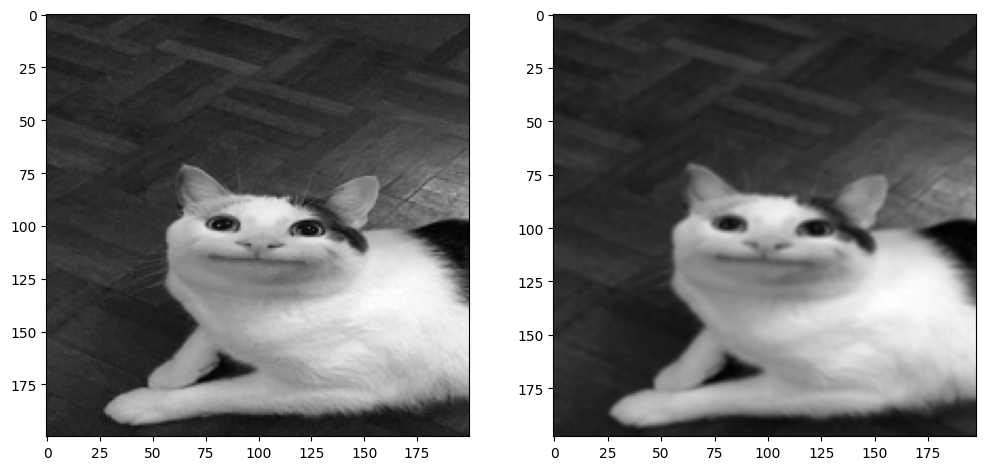

In [10]:
_,ax = plt.subplots(1,2,figsize = (12,6))
ax[0].imshow(img, cmap = 'gray')
ax[1].imshow(image_blur,cmap = 'gray')

### Sharpened Image

In [11]:
image_sharp = convolution(img = np.array(img), kernel = sharp)

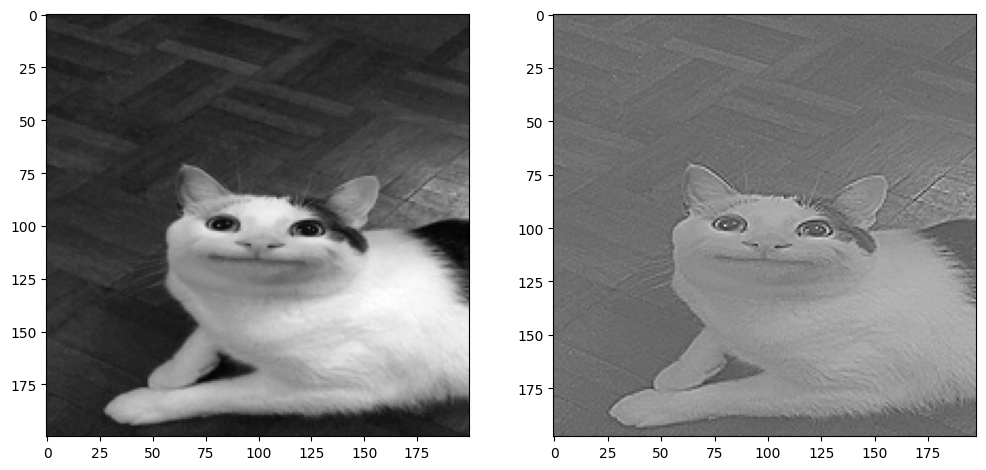

In [12]:
_,ax = plt.subplots(1,2,figsize = (12,6))
ax[0].imshow(img, cmap = 'gray')
ax[1].imshow(image_sharp,cmap = 'gray')

### Outlined Image

In [13]:
image_outline= convolution(img = np.array(img), kernel = outline)

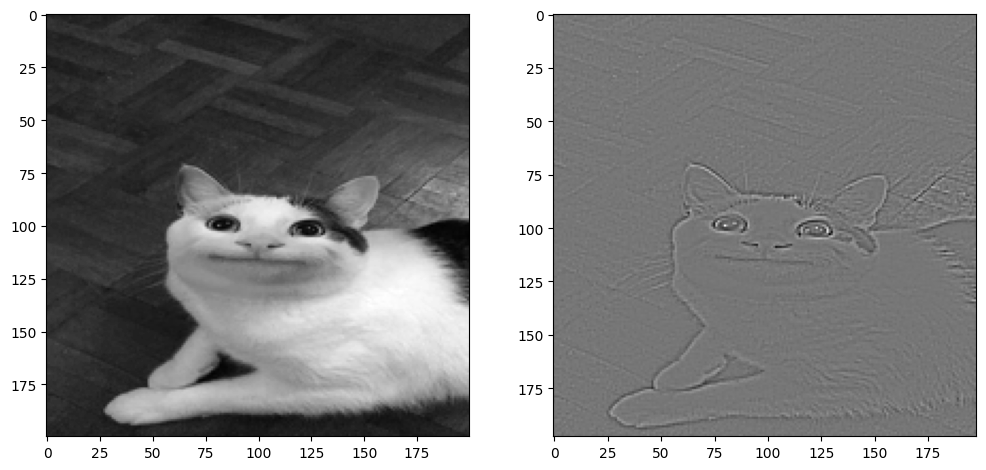

In [14]:
_,ax = plt.subplots(1,2,figsize = (12,6))
ax[0].imshow(img, cmap = 'gray')
ax[1].imshow(image_outline,cmap = 'gray')

### 3-d Enhancement

In [15]:
image_emboss= convolution(img = np.array(img), kernel = emboss)

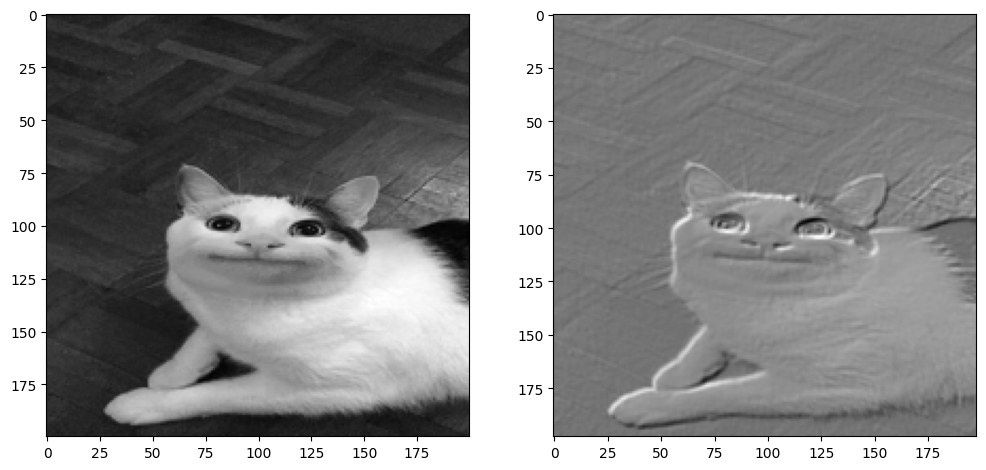

In [16]:
_,ax = plt.subplots(1,2,figsize = (12,6))
ax[0].imshow(img, cmap = 'gray')
ax[1].imshow(image_emboss,cmap = 'gray')

In [17]:
image_guass= convolution(img = np.array(img), kernel = guassian)

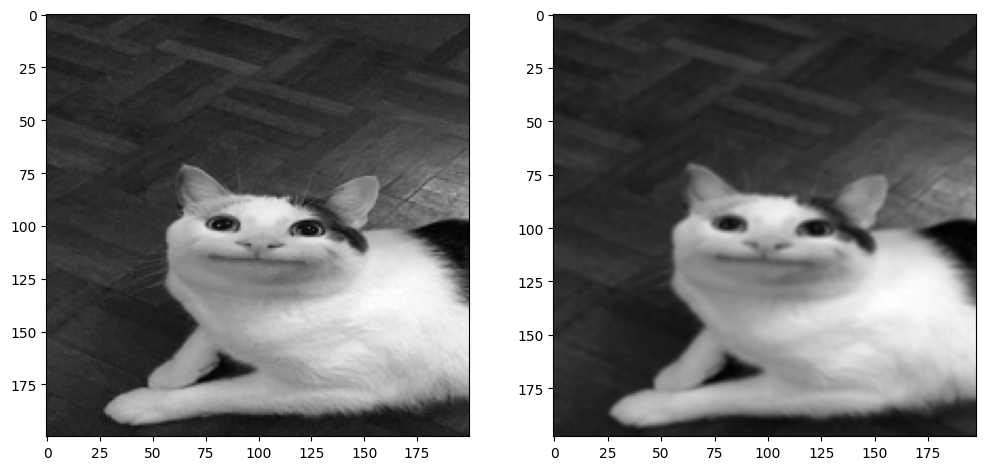

In [18]:
_,ax = plt.subplots(1,2,figsize = (12,6))
ax[0].imshow(img, cmap = 'gray')
ax[1].imshow(image_guass,cmap = 'gray')

## Adding noise to the input image

Including Salt and pepper noise

Here we add salt and pepper noise to the image

In [19]:
def add_noise(img): 
  
    # Getting the dimensions of the image 
    row , col = img.shape 
      
    # Randomly pick some pixels in the 
    # image for coloring them white 
    # Pick a random number between 300 and 10000 
    num_pixels = 1000
    for i in range(num_pixels): 
        
        # Pick a random y coordinate 
        y_coord=random.randint(0, row - 1) 
          
        # Pick a random x coordinate 
        x_coord=random.randint(0, col - 1) 
          
        # Color that pixel to white 
        img[y_coord][x_coord] = 255
          
    # Randomly pick some pixels in 
    # the image for coloring them black 
    # Pick a random number between 300 and 10000 
    num_pixels = 1000
    for i in range(num_pixels): 
        
        # Pick a random y coordinate 
        y_coord=random.randint(0, row - 1) 
          
        # Pick a random x coordinate 
        x_coord=random.randint(0, col - 1) 
          
        # Color that pixel to black 
        img[y_coord][x_coord] = 0
          
    return img 

In [20]:
ps_img = cv2.imread(r'C:\Users\ADMIN\Documents\Fidel_Sem5\dsp_project\cat.jpg', 
                 cv2.IMREAD_GRAYSCALE) 



#Storing the image 
cv2.imwrite('noise_image.jpg', 
            add_noise(ps_img)) 

True

Opening the grained image

In [21]:
img_noise = Image.open(r'C:\Users\ADMIN\Documents\Fidel_Sem5\dsp_project\noise_image.jpg')


In [22]:
img_noise = img_noise.resize(size = (200,200)) # We resize the image

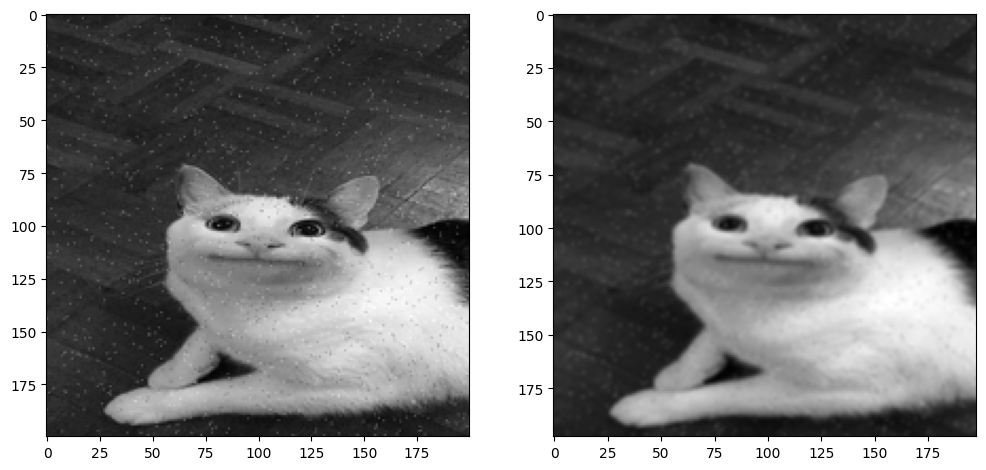

In [23]:
noise_image_blur = convolution(img = np.array(img_noise), kernel = blur)
_,ax = plt.subplots(1,2,figsize = (12,6))
ax[0].imshow(img_noise, cmap = 'gray')
ax[1].imshow(noise_image_blur,cmap = 'gray')



Using the blur kernel(guassian kernel) we can observe that the image has been smoothed.

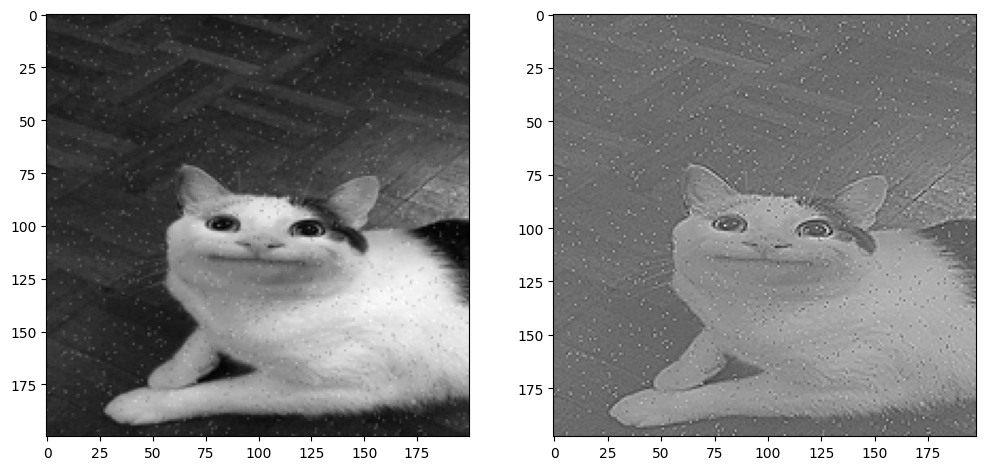

In [24]:
noise_image_sharp = convolution(img = np.array(img_noise), kernel = sharp)
_,ax = plt.subplots(1,2,figsize = (12,6))
ax[0].imshow(img_noise, cmap = 'gray')
ax[1].imshow(noise_image_sharp,cmap = 'gray')


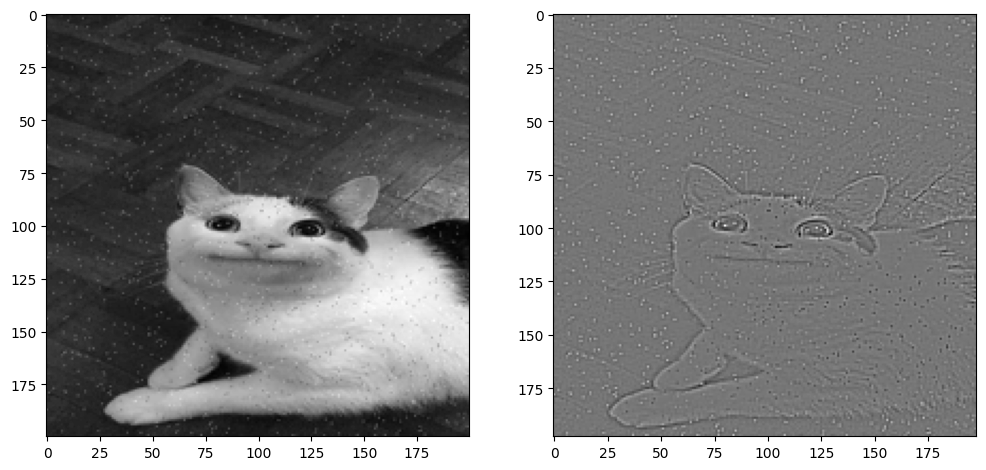

In [25]:
noise_image_out = convolution(img = np.array(img_noise), kernel = outline)
_,ax = plt.subplots(1,2,figsize = (12,6))
ax[0].imshow(img_noise, cmap = 'gray')
ax[1].imshow(noise_image_out,cmap = 'gray')

Outline kernel makes noise more visible

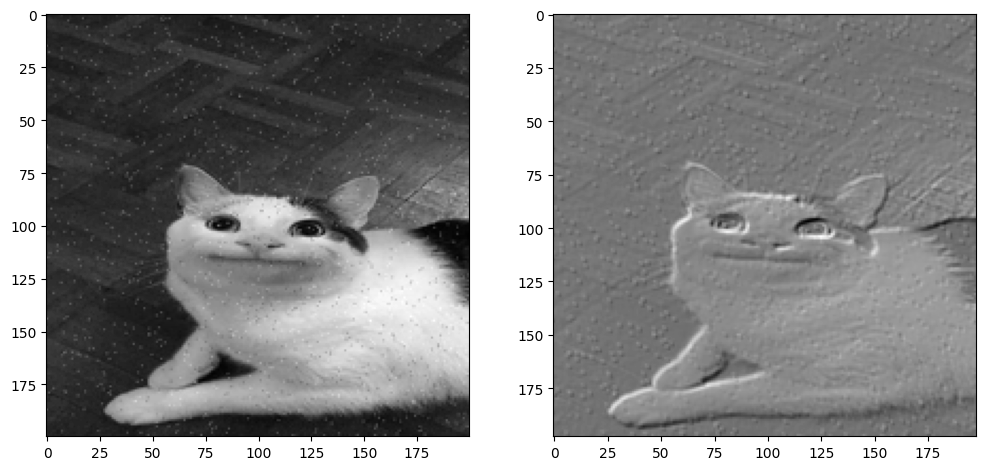

In [26]:
noise_image_emboss = convolution(img = np.array(img_noise), kernel = emboss)
_,ax = plt.subplots(1,2,figsize = (12,6))
ax[0].imshow(img_noise, cmap = 'gray')
ax[1].imshow(noise_image_emboss,cmap = 'gray')

Noisy vs normal

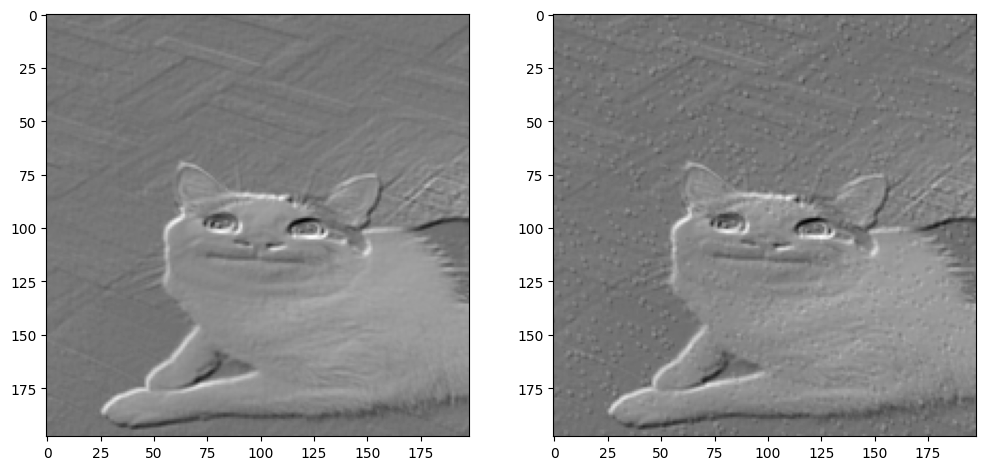

In [27]:
_,ax = plt.subplots(1,2,figsize = (12,6))
ax[0].imshow(image_emboss, cmap = 'gray')
ax[1].imshow(noise_image_emboss,cmap = 'gray')
#  Emboss of originnal image vs emboss of noisy image

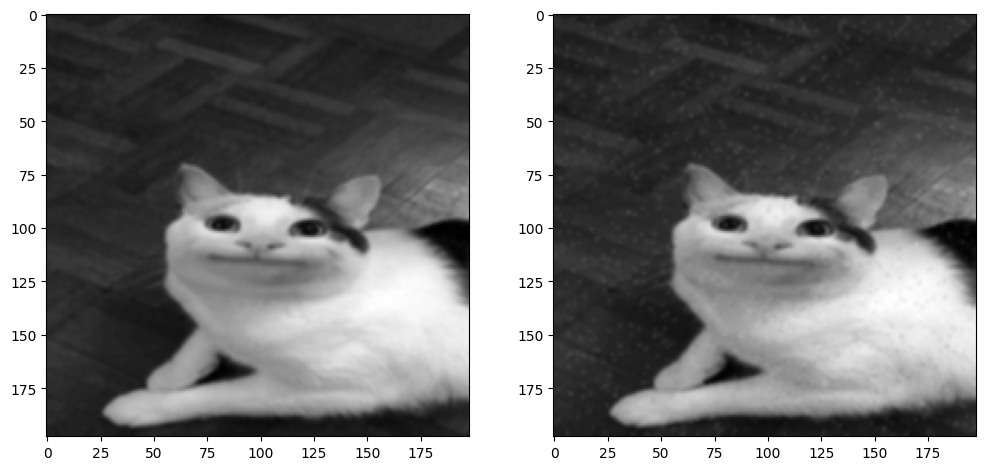

In [28]:
_,ax = plt.subplots(1,2,figsize = (12,6))
ax[0].imshow(image_blur, cmap = 'gray')
ax[1].imshow(noise_image_blur,cmap = 'gray')
# Blur of Original image vs noisy image.